Three points which were used to build the solution are
- length the of text is same as length of BWT and moreover in every column same symbols are present but jumbled
- in a row of burrows wheeler matrix, symbol in last column comes before symbol(alphabet) in the first column
- order in which a particular alphabet appears in first column and last column is same. for example if a appears thrice in bwt or text, if a1 comes before a2 comes before a3 in first column same will be the scenario in the last column

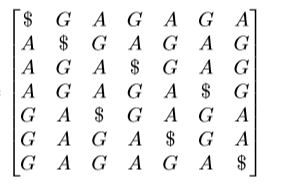

In [32]:
from IPython.display import Image
Image(filename='C:/Users/sudhe/Desktop/temp/Capture.JPG')

from the above image, infer these ideas, I am considering that the matrix is one indexed  
**we have last column(given bwt) and first column (sorted bwt)**
- in row 1, '$' is in first column, and 'A' is in the last column and as it is appearing for the first time in last column, it is A1
- now go and see where A1(first A) is in the first column. that is row 2. so the last element in row 2 (G1) will come before A1
- now go and see where G1(first G) is in the first column, that is row 5, and the last element in row 5 (A2) will come before G1

*....and so on until you add alphabets to the result so it's length is BWT*

In [36]:
def InverseBWT(bwt):
    A_count, C_count, G_count , T_count = 1, 1, 1, 1
    last_col_numbered = ['A'] *len(bwt)
    for idx,c in enumerate(bwt):
        if c == '$':
            last_col_numbered[idx] ='$' #there is only one $
        elif c == 'A':
            last_col_numbered[idx] = 'A'+str(A_count)
            A_count += 1
        elif c == 'C':
            last_col_numbered[idx] = 'C'+ str(C_count)
            C_count += 1
        elif c == 'G':
            last_col_numbered[idx] = 'G'+ str(G_count)
            G_count += 1
        else:
            last_col_numbered[idx] = 'T'+ str(T_count)
            T_count += 1
    first_col_numbered = sorted(last_col_numbered)
#     print(first_col_numbered)
#     first_to_last_map = {}
    first_to_last_map = dict(zip(first_col_numbered,last_col_numbered))
#     print(first_to_last_map)
    #     for i in range(len(first_col_numbered)):
#         first_to_last_map[first_col_numbered[i]] = last_col_numbered[i] #key is first letter of the string and it's value is the last letter of it
#     print(first_to_last_map)
    result = ['A']*len(bwt)
    nextChar = ('$')
    i = 0
    while i < len(bwt):
        result[i] = nextChar[0]
        nextChar = first_to_last_map[nextChar]
        i+=1
    return ''.join(result[::-1])

for tst in range(5):
    print(InverseBWT(input().strip()))

AC$A
['$', 'A1', 'A2', 'C1']
{'$': 'A1', 'A1': 'C1', 'A2': '$', 'C1': 'A2'}
ACA$
AGGGAA$
['$', 'A1', 'A2', 'A3', 'G1', 'G2', 'G3']
{'$': 'A1', 'A1': 'G1', 'A2': 'G2', 'A3': 'G3', 'G1': 'A2', 'G2': 'A3', 'G3': '$'}
GAGAGA$
a
['T1']
{'T1': 'T1'}


KeyError: '$'

In [ ]:
Input: AC$A Output: ACA$
ple 2. Input: AGGGAA$ Output: GAGAGA$ 


In [ ]:
here output is input and input is ouput as these are from problem 1, building bwt
Sample 1. Input: AA$ Output: AA$
Sample 2. Input: ACACACAC$ Output: CCCC$AAAA 
Sample 3. Input: AGACATA$ Output: ATG$CAAA 

In [33]:
45375488/536870912

0.0845184326171875